In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#Import de librerias y modulos
#request y json, para conectar y extraer información de la Api
import requests
import json

#warnings, para evitar advertencias molestas
import warnings 
warnings.simplefilter("ignore")

#pandas, numpy, seaborn y matplotlib para manipular y visualizar los datos
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://pokeapi.co/api/v2/pokemon?offset=0&limit=1154'
response = requests.get(url).json()

#Vamos a generar una tabla, donde tendremos dos columnas
#En la primera, los nombres de los pokemons, en la segunda
#En la segunda, la url de donde extraeremos su información
DF = pd.DataFrame(response['results'])

In [3]:
#Obteniendo el .json del primer pokémon
urlaux = DF.loc[0][1]
responseaux = requests.get(urlaux).json()

#Imprimimos las Keys del diccionario
print(responseaux.keys())

#Imprimimos un separador, a modo de ayuda visual
print("""

    [----------]
    
    """)
    
#Imprimimos los valores de cada par del diccionario, de forma separada, para facilitar su lectura
for i in responseaux.keys():
    print(i)
    print(responseaux[i])
    
    #Nuevamente, imprimimos un separador 
    print("""
    [----------]
    """)

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


    [----------]
    
    
abilities
[{'ability': {'name': 'overgrow', 'url': 'https://pokeapi.co/api/v2/ability/65/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'chlorophyll', 'url': 'https://pokeapi.co/api/v2/ability/34/'}, 'is_hidden': True, 'slot': 3}]

    [----------]
    
base_experience
64

    [----------]
    
forms
[{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'}]

    [----------]
    
game_indices
[{'game_index': 153, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 153, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 153, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 1, 'vers

  De esta primer url extraeremos la siguiente información: 
  - nombre
  - tipo1
  - tipo2
  - altura
  - peso
  - hp
  - ataque
  - defensa
  - ataque_esp
  - defensa_esp
  - velocidad

In [4]:
#Segundo url/ analisis
varaux2 = responseaux['species']['url']
responseaux2 = requests.get(varaux2).json()
responseaux2

{'base_happiness': 50,
 'capture_rate': 45,
 'color': {'name': 'green',
  'url': 'https://pokeapi.co/api/v2/pokemon-color/5/'},
 'egg_groups': [{'name': 'monster',
   'url': 'https://pokeapi.co/api/v2/egg-group/1/'},
  {'name': 'plant', 'url': 'https://pokeapi.co/api/v2/egg-group/7/'}],
 'evolution_chain': {'url': 'https://pokeapi.co/api/v2/evolution-chain/1/'},
 'evolves_from_species': None,
 'flavor_text_entries': [{'flavor_text': 'A strange seed was\nplanted on its\nback at birth.\x0cThe plant sprouts\nand grows with\nthis POKéMON.',
   'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'},
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'flavor_text': 'A strange seed was\nplanted on its\nback at birth.\x0cThe plant sprouts\nand grows with\nthis POKéMON.',
   'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'},
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'flavor_text'

In [5]:
#Obtencion de Keys
print(responseaux2.keys())

#Separador
print("""

    [----------]
    
    """)

#Imprimimos los valores de cada par del diccionario, de forma separada, para facilitar su lectura
for i in responseaux2.keys():
    print(i)
    print(responseaux2[i])
    
    #Separador
    print("""
    [----------]
    """)

dict_keys(['base_happiness', 'capture_rate', 'color', 'egg_groups', 'evolution_chain', 'evolves_from_species', 'flavor_text_entries', 'form_descriptions', 'forms_switchable', 'gender_rate', 'genera', 'generation', 'growth_rate', 'habitat', 'has_gender_differences', 'hatch_counter', 'id', 'is_baby', 'is_legendary', 'is_mythical', 'name', 'names', 'order', 'pal_park_encounters', 'pokedex_numbers', 'shape', 'varieties'])


    [----------]
    
    
base_happiness
50

    [----------]
    
capture_rate
45

    [----------]
    
color
{'name': 'green', 'url': 'https://pokeapi.co/api/v2/pokemon-color/5/'}

    [----------]
    
egg_groups
[{'name': 'monster', 'url': 'https://pokeapi.co/api/v2/egg-group/1/'}, {'name': 'plant', 'url': 'https://pokeapi.co/api/v2/egg-group/7/'}]

    [----------]
    
evolution_chain
{'url': 'https://pokeapi.co/api/v2/evolution-chain/1/'}

    [----------]
    
evolves_from_species
None

    [----------]
    
flavor_text_entries
[{'flavor_text': 'A strange seed

De esta segunda URL extraeremos la siguiente información:
- Numero id en el pokedex nacional
- Generación a la que pertenece
- Si es o no legendario
- Probabilidad de que un pokémon sea macho o hembra. La misma esta expresada de la siguiente forma:
  - -1: La especie pokémon en cuestión no tiene genero
  - 0: 100% de probabilidad de que sea macho
  - 1: 12,5% de probabilidad de que sea hembra
  - 2: 25% de probabilidad de que sea hembra
  - 3: 37,5% de probabilidad de que sea hembra
  - 4: 50% de probabilidad de que sea hembra
  - 5: 62,5% de probabilidad de que sea hembra
  - 6: 75% de probabilidad de que sea hembra
  - 7: 87,5% de probabilidad de que sea hembra
  - 8: 100% de probabilidad de que sea hembra
 

## Generación del DataFrame

In [65]:
#Scraper / Constructor del dataframe
#Definimos las listas que usaremos para cada columna del dataframe
nombre = []
pokedex = []
tipo1 = []
tipo2 = []
altura_m = []
peso_kg = []
hp = []
ataque = []
defensa = []
ataque_esp = []
defensa_esp = []
velocidad = []
generacion = []
legendario = []
genero = []

#Definimos el tamaño del dataframe, 1154 es para todos los pokemon
for i in range(801):
    
    #Obtenemos la primer url de cada pokemon
    urlaux = DF.loc[i][1]
    responseaux = requests.get(urlaux).json()
    
    #Extraemos la informacion y la añadimos a las listas
    nombre.append(responseaux['name'])

    tipo1.append(responseaux['types'][0]['type']['name'])
    
    #Dado que no todos los pokemon tienen 2do tipo, utilizamos un try/except para evitar in IndexError
    try:
        tipo2.append(responseaux['types'][1]['type']['name'])
    except IndexError:
        tipo2.append('No tiene')
    
    #Los siguientes valores se dividen entre 10 puesto que estan expresados en decimetros y centigramos, respectivamente
    altura_m.append(responseaux['height'] / 10)
    peso_kg.append(responseaux['weight'] / 10)

    hp.append(responseaux['stats'][0]['base_stat'])
    ataque.append(responseaux['stats'][1]['base_stat'])
    defensa.append(responseaux['stats'][2]['base_stat'])
    ataque_esp.append(responseaux['stats'][3]['base_stat'])
    defensa_esp.append(responseaux['stats'][4]['base_stat'])
    velocidad.append(responseaux['stats'][5]['base_stat'])

    #Obtenemos la segunda url de cada pokemon
    varaux2 = responseaux['species']['url']
    responseaux2 = requests.get(varaux2).json()
    
    #Extraemos la informacion y la agregamos a las listas
    generacion.append(responseaux2['generation']['name'])
    legendario.append(responseaux2['is_legendary'])
    genero.append(responseaux2['gender_rate'])
    
    #Algunas entradas refieren a formas especiales de pokemons, y por ende no tienen numero de pokedex
    if responseaux2['pokedex_numbers'][0]['pokedex']['name'] == 'national':
        try:
            pokedex.append(responseaux2['pokedex_numbers'][0]['entry_number'])
        except IndexError:
            pokedex.append('')
    else:
        pokedex.append('no tiene')

#Con las listas terminadas generamos el dataframe
pokemon_ds = pd.DataFrame(data={
    'pokedex_id':pokedex,
    'nombre':nombre,
    'tipo1':tipo1,
    'tipo2':tipo2,
    'altura_m':altura_m,
    'peso_kg':peso_kg,
    'hp':hp,
    'ataque':ataque,
    'defensa':defensa,
    'ataque_esp':ataque_esp,
    'defensa_esp':defensa_esp,
    'velocidad':velocidad,
    'generacion':generacion,
    'legendario':legendario,
    'genero':genero})

In [66]:
pokemon_ds.to_csv('/content/drive/MyDrive/Crehana/Data Science/Pokemon Leg Clas/pokemon.csv')


Procedemos a visualizar el dataframe, para corroborar que se haya generado correctamente

In [67]:
pokemon_ds = pd.read_csv('/content/drive/MyDrive/Crehana/Data Science/Pokemon Leg Clas/pokemon.csv', index_col='pokedex_id')
pokemon_ds.drop('Unnamed: 0', axis=1, inplace = True)
pokemon_ds.head(15)

,nombre,tipo1,tipo2,altura_m,peso_kg,hp,ataque,defensa,ataque_esp,defensa_esp,velocidad,generacion,legendario,genero
pokedex_id,,,,,,,,,,,,,,
1,bulbasaur,grass,poison,0.7,6.9,45,49,49,65,65,45,generation-i,False,1
2,ivysaur,grass,poison,1.0,13.0,60,62,63,80,80,60,generation-i,False,1
3,venusaur,grass,poison,2.0,100.0,80,82,83,100,100,80,generation-i,False,1
4,charmander,fire,No tiene,0.6,8.5,39,52,43,60,50,65,generation-i,False,1
5,charmeleon,fire,No tiene,1.1,19.0,58,64,58,80,65,80,generation-i,False,1
6,charizard,fire,flying,1.7,90.5,78,84,78,109,85,100,generation-i,False,1
7,squirtle,water,No tiene,0.5,9.0,44,48,65,50,64,43,generation-i,False,1
8,wartortle,water,No tiene,1.0,22.5,59,63,80,65,80,58,generation-i,False,1
9,blastoise,water,No tiene,1.6,85.5,79,83,100,85,105,78,generation-i,False,1


## Limpieza de datos

In [16]:
pokemon_ds.isnull().sum()

nombre         0
tipo1          0
tipo2          0
altura_m       0
peso_kg        0
hp             0
ataque         0
defensa        0
ataque_esp     0
defensa_esp    0
velocidad      0
generacion     0
legendario     0
genero         0
dtype: int64

In [17]:
pokemon_ds.duplicated().sum()

0

El dataframe no posee datos nulos ni duplicados.

# 2. Analisis Exploratorio de Datos

## Descripción de las variables

Nuestro dataset esta conformado por 13 columnas, a continuación explicamos que información se presenta en cada una de ellas:

* **nombre:** El nombre (utilizado internacionalmente, excepto en japon) del pokémon
* **tipo1:** La naturaleza principal de los ataques del pokemon. Se utiliza para calcular ventajas y desventajas sobre otros pokemons
* **tipo2:** La naturaleza secundaria de los ataques del pokemon. Se suele obtener al evolucionar, y no todas las especies poseen una
* **altura_m:** La altura, expresada en metros
* **peso_kg:** El peso, expresado en kilogramos
* **generacion:** La generación en la cual fue introducido el pokemon. Cada generación se corresponde con un conjunto de entregas donde el mapa era ampliado respecto de la generación anterior.
* **legendario:**	Los pokemon legendarios son escasos, dificiles de encontrar, y generalmente se los asocia con un poder fuera de lo comun. 

En las siguientes columnas se enlistan las estadisticas "base" del pokemon. Las mismas son modificadas de forma permanente al subir de nivel, asi como pueden ser modificadas temporalmente al utilizar diversos objetos:
* **hp:** Los puntos de vida. Durante el combate los puntos bajan con cada ataque recibido, y pueden ser regenerados de diversas formas. Al llegar a cero, el pokemon queda fuera de combate.
* **ataque:** Los puntos base para ataques normales
* **defensa:** Los puntos base de defensa contra ataques normales
* **ataque_esp:** Los puntos base para ataques especiales
* **defensa_esp:** Los puntos base de defensa contra ataques especiales
* **velocidad:** La velocidad. Se utiliza principalmente para determinar que pokemon ataca primero,

## Analisis de variables

### Analisis univariado

In [22]:
pokemon_ds.describe()

,altura_m,peso_kg,hp,ataque,defensa,ataque_esp,defensa_esp,velocidad,genero
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.00000,1154.000000
mean,1.262045,69.888302,69.939341,80.061525,74.012132,72.505199,71.708839,69.52773,2.896014
std,1.371162,127.404842,26.475565,31.747467,30.271535,32.210475,27.029202,29.87310,2.254324
min,0.100000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.00000,-1.000000
25%,0.500000,8.500000,50.000000,55.000000,50.000000,50.000000,50.000000,45.00000,1.000000
50%,1.000000,29.500000,68.000000,75.000000,70.000000,65.000000,70.000000,67.00000,4.000000
75%,1.500000,70.375000,82.000000,100.000000,90.000000,95.000000,90.000000,90.00000,4.000000
max,20.000000,999.900000,255.000000,190.000000,230.000000,194.000000,230.000000,200.00000,8.000000


In [23]:
for variable in list(pokemon_ds.columns):
    
    if str(pokemon_ds[variable].dtype) == 'int64' or str(pokemon_ds[variable].dtype) == 'float64':
        
        stats = pokemon_ds[variable].describe()

        # Calcular la mediana y la moda para una variable
        mediana = pokemon_ds[variable].median()
        moda = pokemon_ds[variable].mode()[0]

        # Calcular el rango y la desviación estándar para una variable
        rango = pokemon_ds[variable].max() - pokemon_ds[variable].min()
        desviacion_estandar = pokemon_ds[variable].std()
        
        print('Variable: ', variable, '\n')
    
        print('Estadísticas descriptivas para', variable, ': \n', stats, '\n')
        print('Mediana de', variable, ':', mediana)
        print('Moda de', variable, ':', moda)
        print('Rango de', variable, ':', rango)
        print('Desviación estándar de', variable, ':', desviacion_estandar, '\n')
        print('Desviación estandar del:', desviacion_estandar/mediana*100, '% de la mediana')
        
        print('--------------------------------------------------------------------------')
    
    else:
        
        continue

Variable:  altura_m 

Estadísticas descriptivas para altura_m : 
 count    1154.000000
mean        1.262045
std         1.371162
min         0.100000
25%         0.500000
50%         1.000000
75%         1.500000
max        20.000000
Name: altura_m, dtype: float64 

Mediana de altura_m : 1.0
Moda de altura_m : 0.3
Rango de altura_m : 19.9
Desviación estándar de altura_m : 1.371161779621545 

Desviación estandar del: 137.1161779621545 % de la mediana
--------------------------------------------------------------------------
Variable:  peso_kg 

Estadísticas descriptivas para peso_kg : 
 count    1154.000000
mean       69.888302
std       127.404842
min         0.100000
25%         8.500000
50%        29.500000
75%        70.375000
max       999.900000
Name: peso_kg, dtype: float64 

Mediana de peso_kg : 29.5
Moda de peso_kg : 6.0
Rango de peso_kg : 999.8
Desviación estándar de peso_kg : 127.40484193524142 

Desviación estandar del: 431.88082011946244 % de la mediana
--------------------

Las columnas peso_kg y altura_m presentan una desviación estandar demasiado alta.

peso_kg :
Esta distribución tiene una asimetria de: 4.217391188413518
Esta distribución tiene una curtosis de: 21.92154011659279
-------------------------------------------------------
altura_m :
Esta distribución tiene una asimetria de: 5.680962637329065
Esta distribución tiene una curtosis de: 51.00959529333077
-------------------------------------------------------


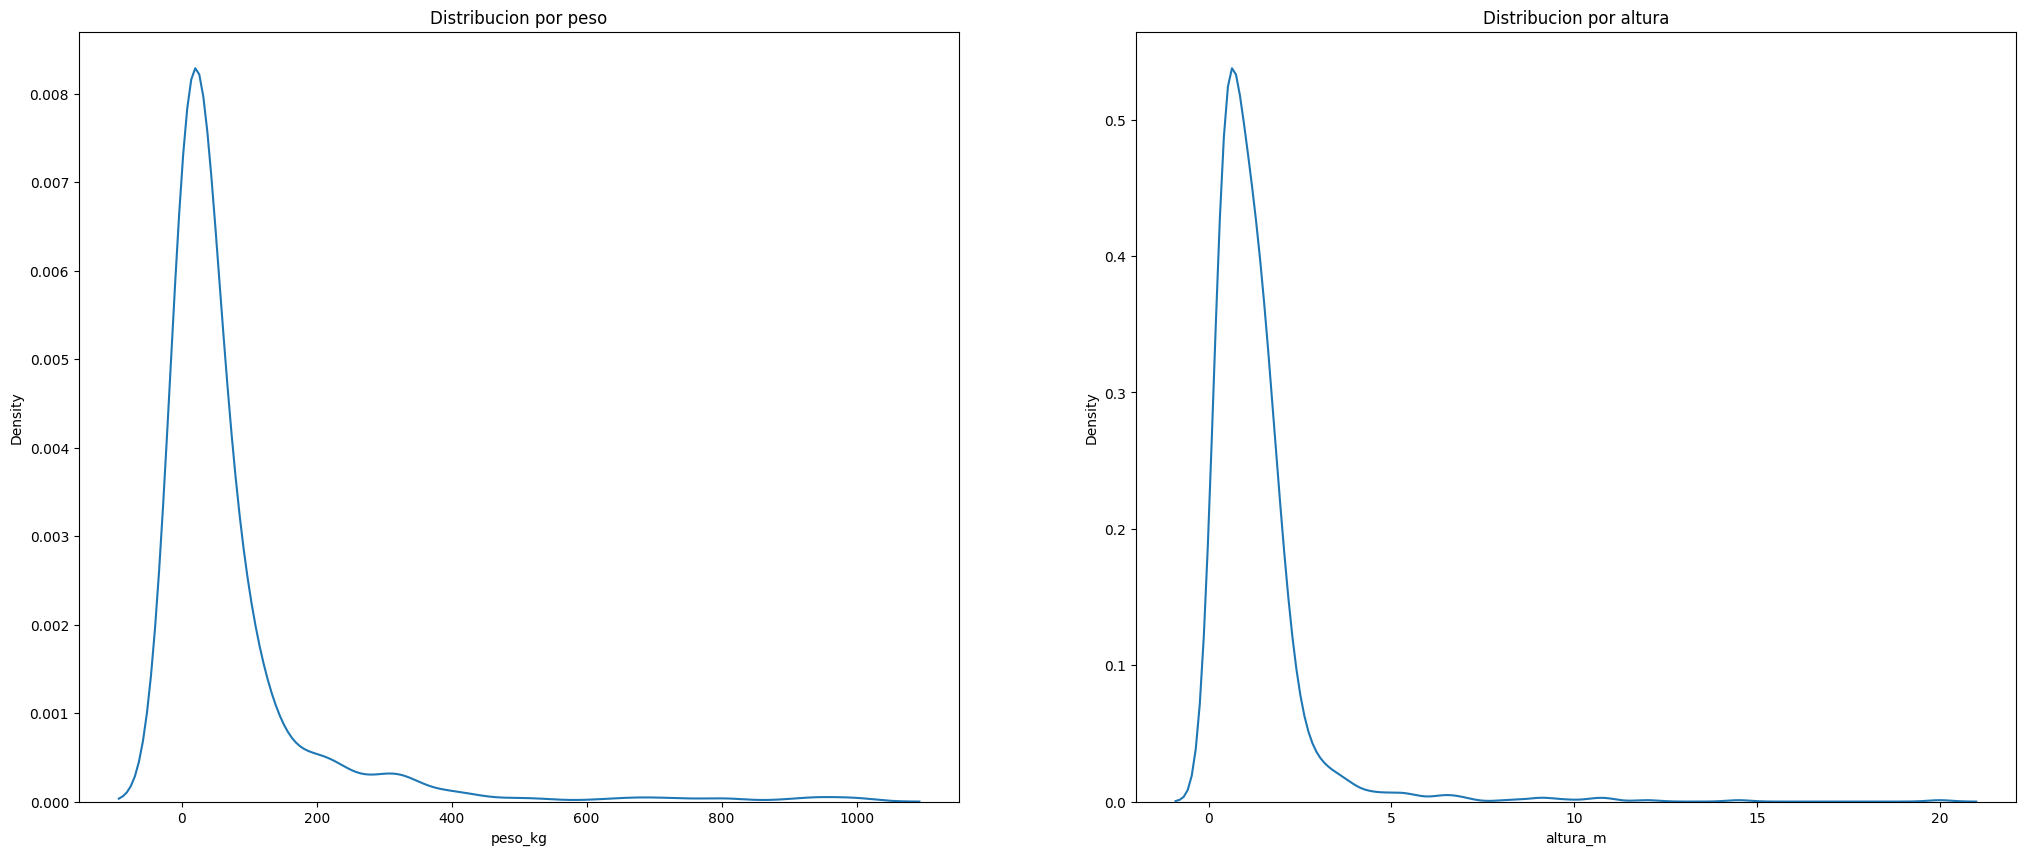

In [24]:
plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
sns.kdeplot(data = pokemon_ds, x='peso_kg')
plt.title('Distribucion por peso')

plt.subplot(1,2,2)
sns.kdeplot(data = pokemon_ds, x = 'altura_m')
plt.title('Distribucion por altura')

plt.show

cols_skew_curt = ['peso_kg','altura_m']

for i in cols_skew_curt:
  print(i, ':')
  print('Esta distribución tiene una asimetria de:', pokemon_ds[i].skew())
  print('Esta distribución tiene una curtosis de:', pokemon_ds[i].kurt())
  print('-------------------------------------------------------')

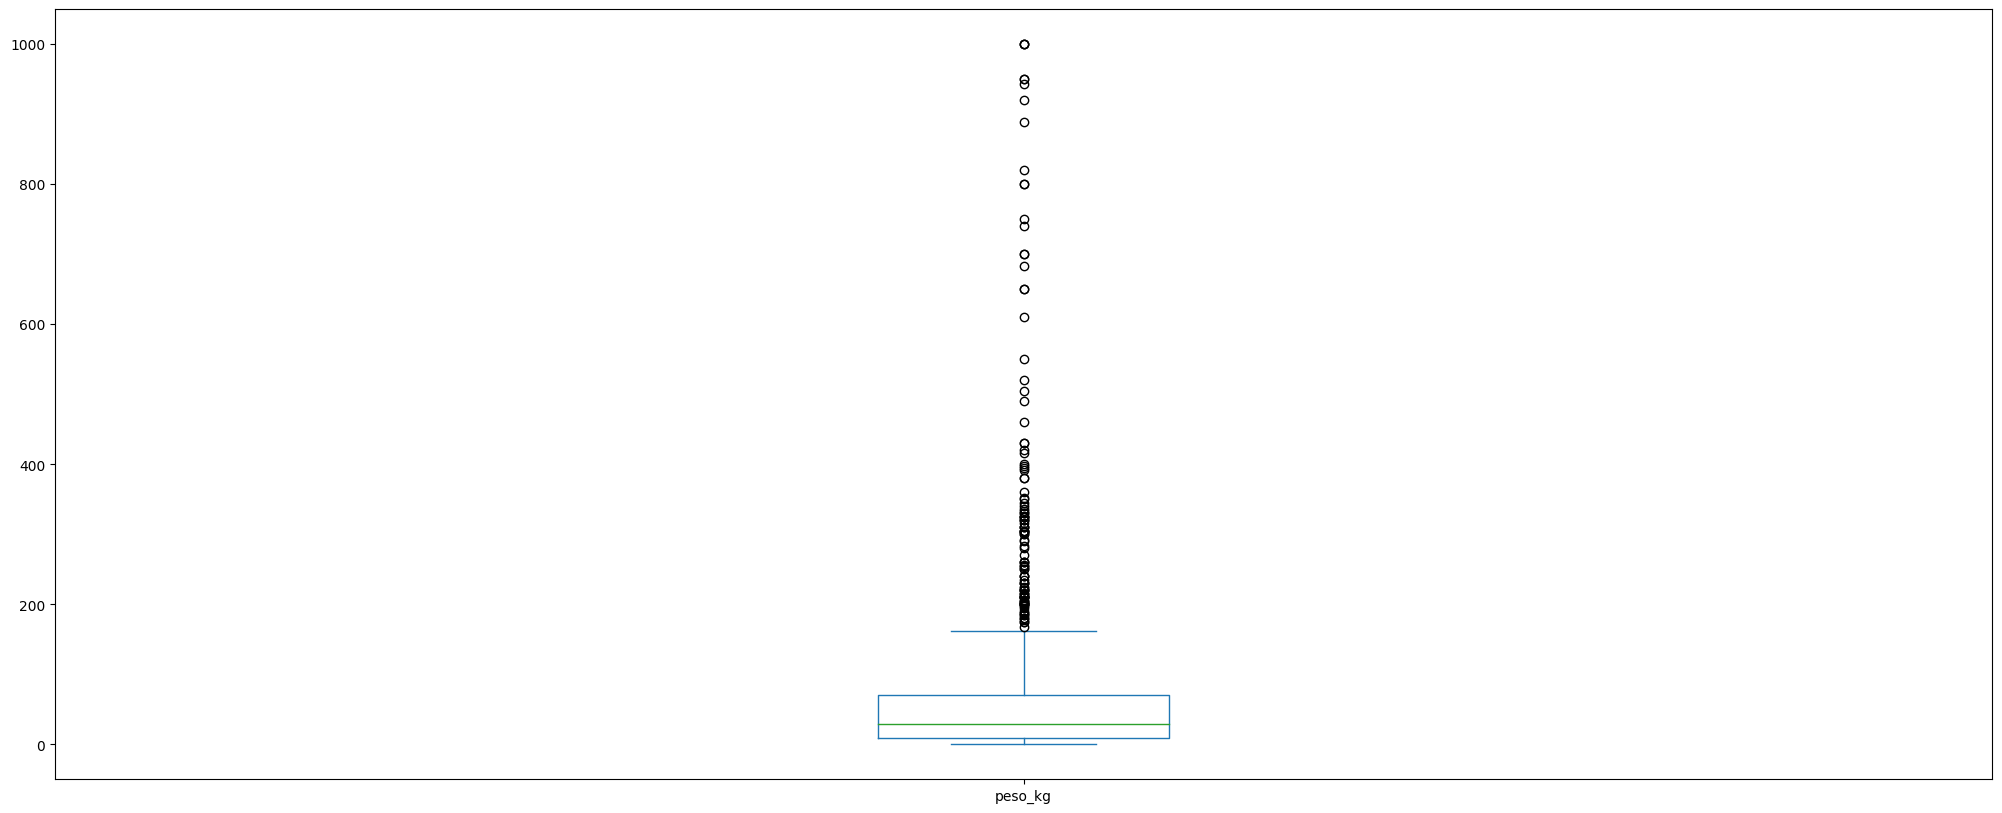

In [25]:
plt.figure(figsize = (25,10))
pokemon_ds.peso_kg.plot.box()
plt.show()

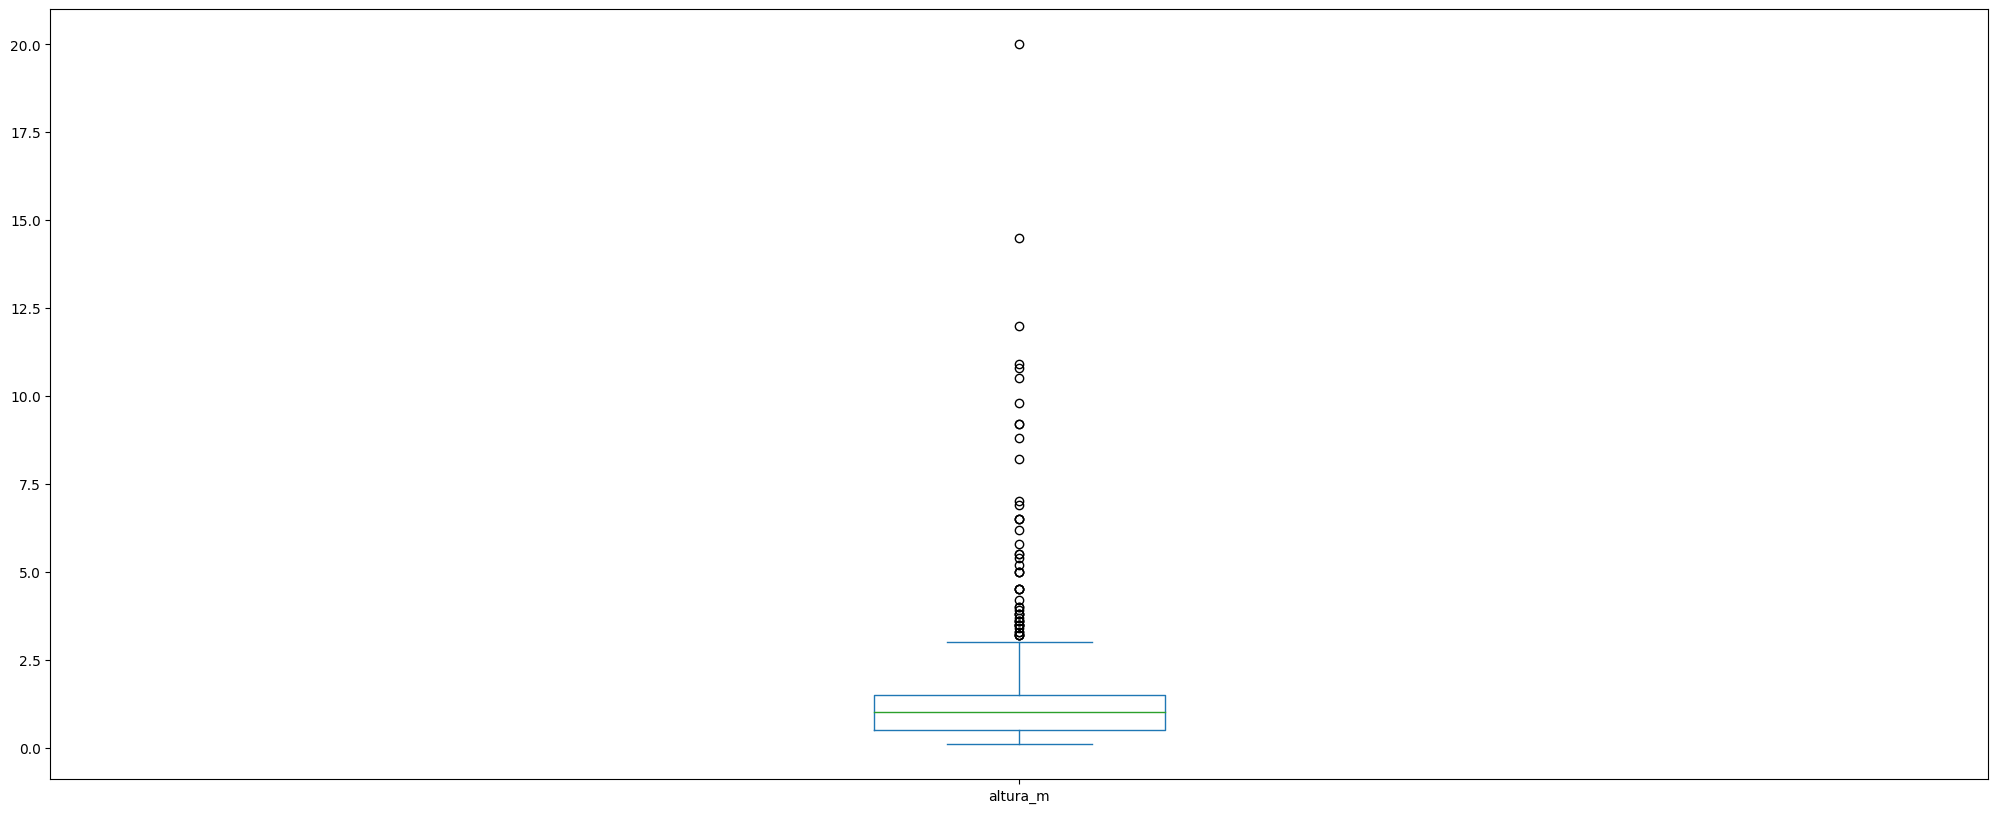

In [26]:
plt.figure(figsize = (25,10))
pokemon_ds.altura_m.plot.box()
plt.show()

Observemos la distribución de pokémons por genero, generación y tipo

<Figure size 2000x10000 with 0 Axes>

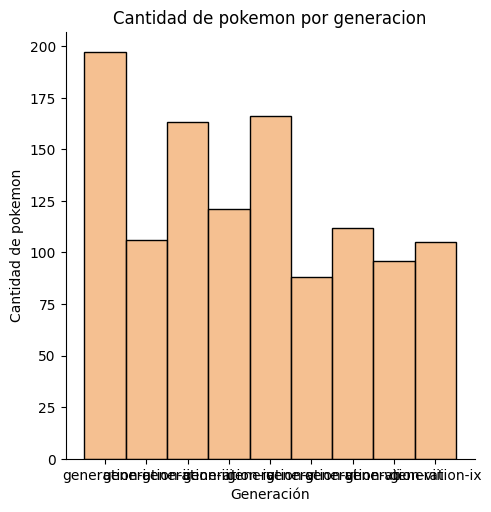

In [34]:
plt.figure(figsize=(20, 100))

sns.displot(pokemon_ds['generacion'], color='#F2AB6D', kde=False)

plt.ylabel('Cantidad de pokemon')
plt.xlabel('Generación')
plt.title('Cantidad de pokemon por generacion')

plt.show()

**Distribución por tipo (principal):**

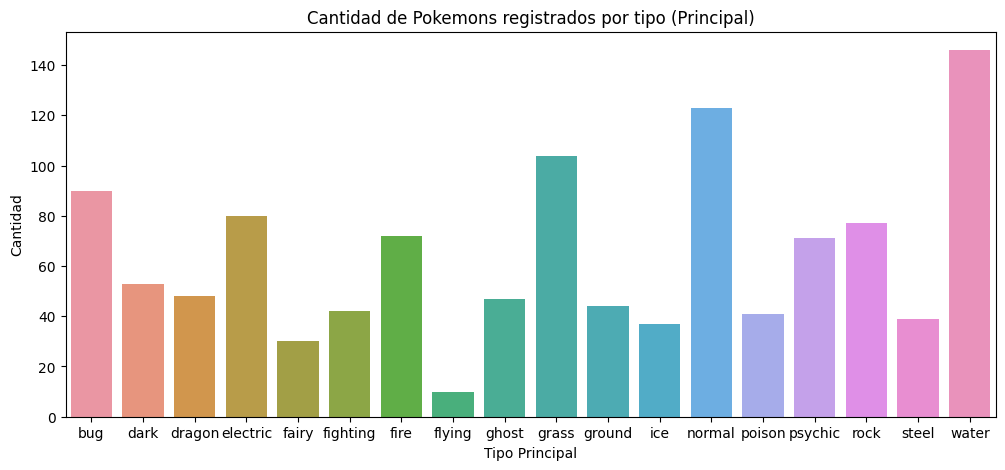

tipo1
bug          90
dark         53
dragon       48
electric     80
fairy        30
fighting     42
fire         72
flying       10
ghost        47
grass       104
ground       44
ice          37
normal      123
poison       41
psychic      71
rock         77
steel        39
water       146
Name: tipo1, dtype: int64


In [28]:
plt.figure(figsize=(12,5))
type1valores= pokemon_ds.groupby('tipo1').tipo1.count()
plt.title("Cantidad de Pokemons registrados por tipo (Principal)")
g = sns.barplot(x=type1valores.index, y=type1valores, )
g.set_xlabel('Tipo Principal')
g.set_ylabel('Cantidad')
plt.show()

print(pokemon_ds.groupby('tipo1').tipo1.count())

**Distribución por tipo (secundario):**

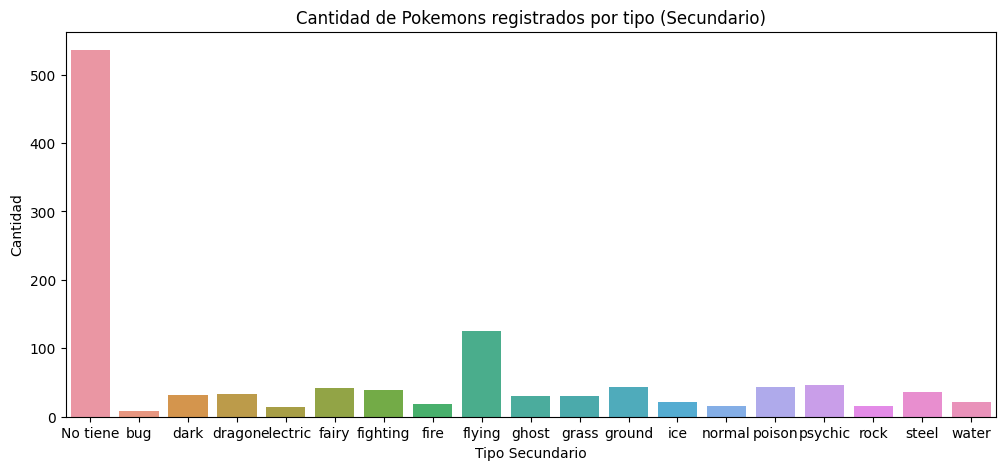

tipo2
No tiene    536
bug           9
dark         32
dragon       33
electric     14
fairy        42
fighting     39
fire         19
flying      126
ghost        30
grass        31
ground       43
ice          21
normal       16
poison       44
psychic      46
rock         16
steel        36
water        21
Name: tipo2, dtype: int64


In [35]:
plt.figure(figsize=(12,5))
type2valores= pokemon_ds.groupby('tipo2').tipo2.count()
plt.title("Cantidad de Pokemons registrados por tipo (Secundario)")
g = sns.barplot(x=type2valores.index, y=type2valores, )
g.set_xlabel('Tipo Secundario')
g.set_ylabel('Cantidad')
plt.show()

print(pokemon_ds.groupby('tipo2').tipo2.count())

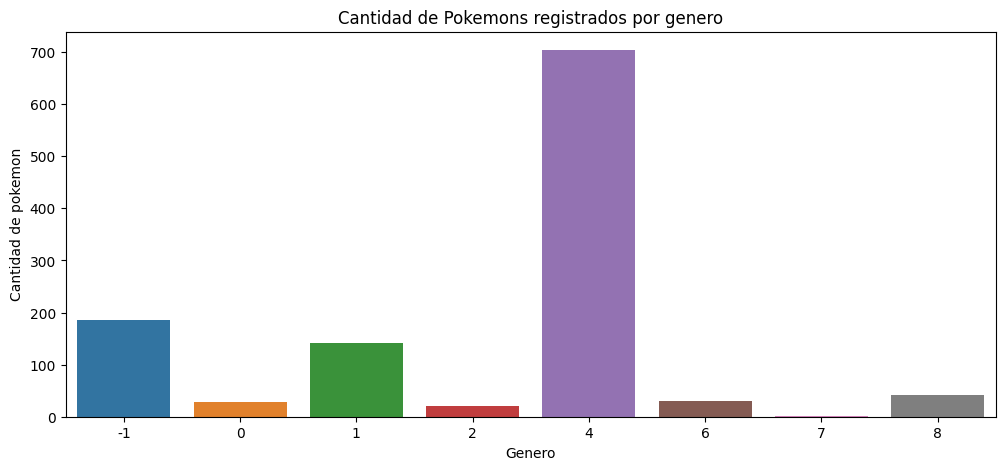

genero
-1    186
 0     28
 1    142
 2     20
 4    704
 6     30
 7      2
 8     42
Name: genero, dtype: int64


In [36]:
plt.figure(figsize=(12,5))
type1valores= pokemon_ds.groupby('genero').genero.count()
plt.title("Cantidad de Pokemons registrados por genero")
g = sns.barplot(x=type1valores.index, y=type1valores, )
g.set_xlabel('Genero')
g.set_ylabel('Cantidad de pokemon')
plt.show()

print(pokemon_ds.groupby('genero').genero.count())

### Analisis bivariado


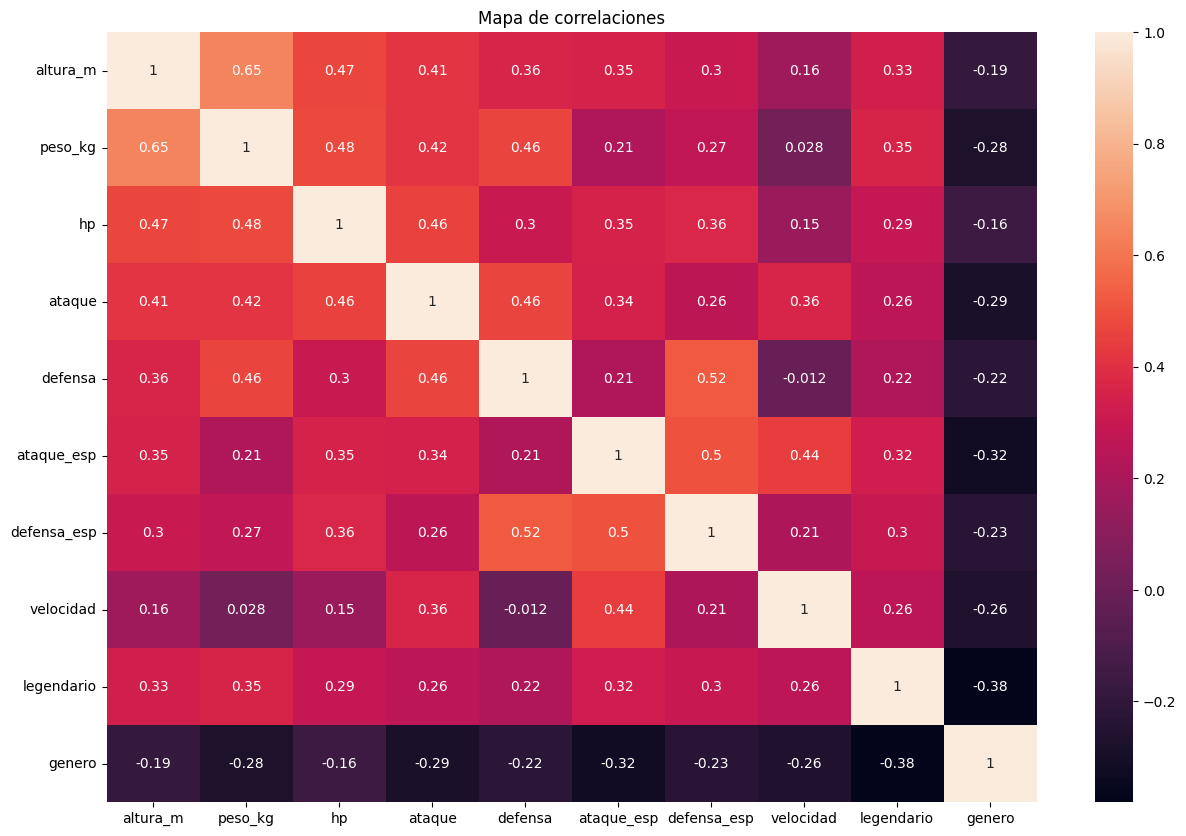

In [39]:
plt.figure(figsize = (15,10))

sns.heatmap(pokemon_ds.corr(), annot=True)
plt.title('Mapa de correlaciones')

plt.show()

In [42]:
sns.set()
        
sns.pairplot(pokemon_ds,
             x_vars=pokemon_ds.drop(['nombre','legendario', 'generacion', 'tipo1', 'tipo2'], axis=1),
             y_vars=pokemon_ds.drop(['nombre','legendario', 'generacion', 'tipo1', 'tipo2'], axis=1),
             hue= 'legendario',
             height= 3)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

Vemos ciertas tendencias claras. Por ejemplo, los legendarios tienden a tener stats mucho mas elevados que los demas pokemon. Tambien tienden a no tener genero, lo cual se explica puesto que, en su mayoría, son unicos. 

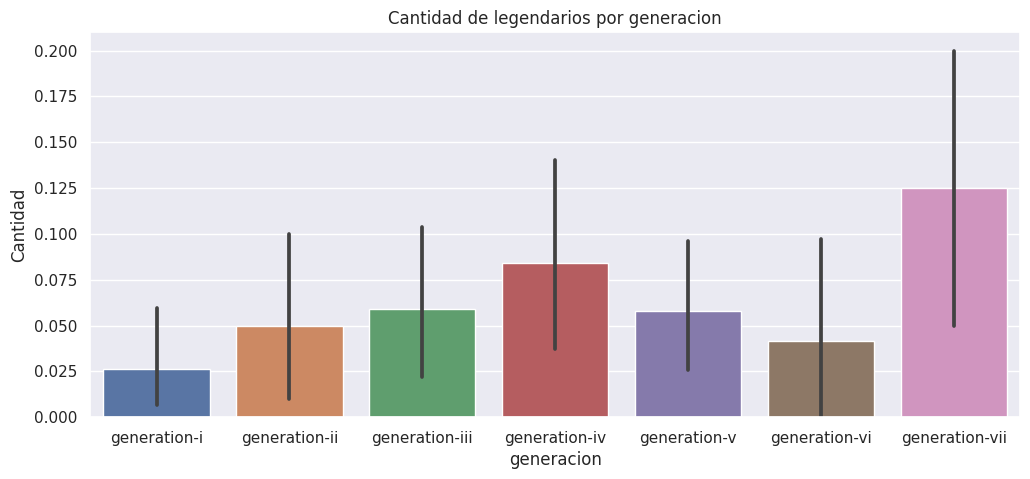

In [84]:
plt.figure(figsize=(12,5))

plt.title("Cantidad de legendarios por generacion")
g = sns.barplot(x=pokemon_ds.generacion, y=pokemon_ds.legendario)
g.set_xlabel('generacion')
g.set_ylabel('Cantidad')
plt.show()


# Machine Learning


In [104]:
#Metricas, para evaluar los modelos
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import randint
from sklearn.metrics import classification_report


#Train-test Split
from sklearn.model_selection import train_test_split

#Randomized Search, para el hypertuning
from sklearn.model_selection import RandomizedSearchCV

#Regresion logistica
from sklearn.linear_model import LogisticRegression

#RandomForest
from sklearn.ensemble import RandomForestRegressor

#tensorflow y keras para redes neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import backend as K

#XGboost
import xgboost as xgb

## Preparación de los datos

In [70]:
auxcol = []

for i in range(len(pokemon_ds.nombre)):
  if str(pokemon_ds.legendario[i+1]) == 'True':
    auxcol.append(1)
  else:
    auxcol.append(0)

pokemon_ds['legendario'] = auxcol

In [87]:
auxcol = []

for i in range(len(pokemon_ds.nombre)):
  if str(pokemon_ds.generacion[i+1]) == 'generation-i':
    auxcol.append(1)
  elif str(pokemon_ds.generacion[i+1]) == 'generation-ii':
    auxcol.append(2)
  elif str(pokemon_ds.generacion[i+1]) == 'generation-iii':
    auxcol.append(3)
  elif str(pokemon_ds.generacion[i+1]) == 'generation-iv':
    auxcol.append(4)
  elif str(pokemon_ds.generacion[i+1]) == 'generation-v':
    auxcol.append(5)
  elif str(pokemon_ds.generacion[i+1]) == 'generation-vi':
    auxcol.append(6)
  elif str(pokemon_ds.generacion[i+1]) == 'generation-vii':
    auxcol.append(7)

pokemon_ds['generacion'] = auxcol

## Random Forest

In [105]:
#Train/test split
y = pokemon_ds.legendario
features = ['altura_m',	'peso_kg',	'hp',	'ataque',	'defensa',	'ataque_esp',	'defensa_esp',	'velocidad',	'generacion',	'genero']
X = pokemon_ds[features]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (640, 10)
Tamaño del set de testeo: (161, 10)


In [106]:
rf = RandomForestRegressor()


In [107]:
param_dist = {'n_estimators': randint(10, 200),
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': randint(2, 50),
              'min_samples_leaf': randint(1, 50),
              'max_features': ['auto', 'sqrt', 'log2', None]}


In [108]:
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, n_jobs=-1)


In [109]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4fd5f70760>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4fc8c51790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4fd5ff8970>})

In [110]:
best_params = random_search.best_params_
rf = RandomForestRegressor(**best_params)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, max_features='log2', min_samples_split=3,
                      n_estimators=190)

In [111]:
predictions = rf.predict(X_test)

In [112]:
print(predictions)

[2.12039664e-04 7.42562335e-04 5.66178563e-01 8.89248592e-05
 8.89248592e-05 8.89248592e-05 8.89248592e-05 8.89248592e-05
 8.89248592e-05 9.35290017e-03 1.09198327e-02 6.44199159e-03
 5.45457599e-02 2.58173176e-02 8.27728028e-03 5.22210636e-02
 1.55040340e-02 1.82030500e-02 2.22397329e-02 8.81363248e-01
 9.07587338e-03 2.12039664e-04 1.72467048e-04 1.38333149e-01
 8.89248592e-05 2.69247902e-04 2.01241638e-03 1.55355558e-01
 8.89248592e-05 7.95633420e-02 4.87320008e-03 4.22639581e-04
 6.99277209e-03 5.50780255e-04 2.87090189e-01 1.12372266e-02
 9.01632270e-02 6.47261071e-04 2.61487413e-04 8.89248592e-05
 1.10069895e-02 8.89248592e-05 2.99235012e-03 8.89248592e-05
 1.53092176e-03 8.89248592e-05 1.31032245e-03 2.23384600e-03
 8.89248592e-05 8.89248592e-05 8.89248592e-05 1.15461921e-03
 5.46256212e-04 7.45091896e-03 8.89248592e-05 2.21832887e-04
 3.26456140e-04 3.41609342e-02 4.40262889e-01 1.22900239e-01
 2.12039664e-04 6.85354097e-04 8.89248592e-05 1.58209165e-02
 2.32707516e-02 8.892485

In [113]:
y_pred = []

for i in predictions:
  if i >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

print(np.array(y_pred))

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [114]:
#Almacenamos las metricas en una variable
#para luego compararlas con las metricas de los otros modelos
OpRFAc = float(metrics.accuracy_score(y_test, y_pred))
OpRFPr = float(metrics.precision_score(y_test, y_pred))
OpRFRc = float(metrics.recall_score(y_test, y_pred))
OpRFF1 = float(metrics.f1_score(y_test, y_pred))

#Evaluamos las metricas
print('Matriz de confusion:')
print(metrics.confusion_matrix(y_test, y_pred))
print('Classification report:')
print(metrics.classification_report(y_test,y_pred))
print('-----------------------------------------------------------------------------')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Matriz de confusion:
[[151   0]
 [  4   6]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       151
           1       1.00      0.60      0.75        10

    accuracy                           0.98       161
   macro avg       0.99      0.80      0.87       161
weighted avg       0.98      0.98      0.97       161

-----------------------------------------------------------------------------
Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.6
F1: 0.7499999999999999


## XGBoost

In [115]:
#Train/test split
y = pokemon_ds.legendario
features = ['altura_m',	'peso_kg',	'hp',	'ataque',	'defensa',	'ataque_esp',	'defensa_esp',	'velocidad',	'generacion',	'genero']
X = pokemon_ds[features]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (640, 10)
Tamaño del set de testeo: (161, 10)


In [116]:
xgb_class = xgb.XGBClassifier()

In [117]:
random_search = RandomizedSearchCV(xgb_class, param_distributions=param_dist,
                                   n_iter=10, cv=5, n_jobs=-1)

In [118]:
random_search.fit(X_train, y_train)

[15:42:28] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4fd5f70760>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4fc8c51790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4fd5ff8970>})

In [119]:
best_paramsxg = random_search.best_params_
xg = xgb.XGBClassifier(**best_params)
xg.fit(X_train, y_train)

[15:42:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_features='log2',
              max_leaves=None, min_child_weight=None, min_samples_leaf=1,
              min_samples_split=3, missing=nan, monotone_constraints=None,
              n_estimators=190, n_jobs=None, ...)

In [120]:
y_pred = xg.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [121]:
#Almacenamos las metricas en una variable
#para luego compararlas con las metricas de los otros modelos
OpXGAc = float(metrics.accuracy_score(y_test, y_pred))
OpXGPr = float(metrics.precision_score(y_test, y_pred))
OpXGRc = float(metrics.recall_score(y_test, y_pred))
OpXGF1 = float(metrics.f1_score(y_test, y_pred))

#Evaluamos las metricas
print('Matriz de confusion:')
print(metrics.confusion_matrix(y_test, y_pred))
print('Classification report:')
print(metrics.classification_report(y_test,y_pred))
print('-----------------------------------------------------------------------------')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Matriz de confusion:
[[151   0]
 [  2   8]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       151
           1       1.00      0.80      0.89        10

    accuracy                           0.99       161
   macro avg       0.99      0.90      0.94       161
weighted avg       0.99      0.99      0.99       161

-----------------------------------------------------------------------------
Accuracy: 0.9875776397515528
Precision: 1.0
Recall: 0.8
F1: 0.888888888888889


## Analisis de resultados

In [122]:
print('Metricas Random Forest con hypertuning:')
print('Accuracy:',OpRFAc)
print('Precision:',OpRFPr)
print('Recall:',OpRFRc)
print('F1:',OpRFF1)
print('--------------------------------------------------------')

print('Metricas XGboost con hypertuning:')
print('Accuracy:',OpXGAc)
print('Precision:',OpXGPr)
print('Recall:',OpXGRc)
print('F1:',OpXGF1)
print('--------------------------------------------------------')

Metricas Random Forest con hypertuning:
Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.6
F1: 0.7499999999999999
--------------------------------------------------------
Metricas XGboost con hypertuning:
Accuracy: 0.9875776397515528
Precision: 1.0
Recall: 0.8
F1: 0.888888888888889
--------------------------------------------------------
